In [1]:
#importing the data and needed packages to manipulate the data
import numpy as np
import pandas as pd
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true")
df

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0
...,...,...,...,...,...,...,...,...,...,...,...
48837,b. 31-40,e. High,b. Mid,a. = 0,b. Mid,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48838,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,c. 31-35 & 61-70,test,0
48839,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48840,b. 31-40,b. Mid - Low,a. Low,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,test,0


In [2]:
#Looking at the type, and number of features in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [3]:
#Descriptive statistics for the features
df.describe(include="object")

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag
count,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,5,5,3,3,3,5,5,2,5,2
top,b. 31-40,c. Mid - Mid,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,e. 40-55,train
freq,26639,13971,22047,42525,29737,30324,30324,46012,13963,32561


In [4]:
#Finding if there are any missing values
df.isna().sum()

#The dataset has no missing values.

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [6]:
#Encoding using label encoding for columns with ordinal variables and one hot encoding for columns with nominal variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encodings = {
    'capital_gl_bin': {'b. < 0': 0, 'a. = 0': 1, 'c. > 0': 2},
    'education_num_bin': {'a. 0-8': 0, 'b. 9-12': 1, 'c. 13': 2, 'd. 14': 3, 'e. 15+': 4}
}

# Applying label encoding to capital_gl_bin and education_num_bin columns
for col, encodings in label_encodings.items():
    le = LabelEncoder()
    df[col] = df[col].map(encodings)
    df[col] = le.fit_transform(df[col])

In [7]:
# Applying one-hot encoding to all other categorical columns
categorical_columns = ['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'race_sex_bin', 'education_bin', 'workclass_bin', 'age_bin']
for col in categorical_columns:
    ohe = OneHotEncoder(sparse=False)
    encoded = ohe.fit_transform(df[[col]])
    df = pd.concat([df, pd.DataFrame(encoded, columns=[col + "_" + str(i) for i in range(encoded.shape[1])])], axis=1)
    df.drop(col, axis=1, inplace=True)

# Printing the encoded dataset
df.head()




,capital_gl_bin,education_num_bin,flag,y,hours_per_week_bin_0,hours_per_week_bin_1,hours_per_week_bin_2,hours_per_week_bin_3,hours_per_week_bin_4,occupation_bin_0,...,education_bin_2,education_bin_3,education_bin_4,workclass_bin_0,workclass_bin_1,age_bin_0,age_bin_1,age_bin_2,age_bin_3,age_bin_4
0,2,2,train,0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,2,train,0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1,1,train,0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,0,train,0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1,2,train,0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [9]:
#verifying whether the encoding worked by looking at change in type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   capital_gl_bin        48842 non-null  int64  
 1   education_num_bin     48842 non-null  int64  
 2   flag                  48842 non-null  object 
 3   y                     48842 non-null  int64  
 4   hours_per_week_bin_0  48842 non-null  float64
 5   hours_per_week_bin_1  48842 non-null  float64
 6   hours_per_week_bin_2  48842 non-null  float64
 7   hours_per_week_bin_3  48842 non-null  float64
 8   hours_per_week_bin_4  48842 non-null  float64
 9   occupation_bin_0      48842 non-null  float64
 10  occupation_bin_1      48842 non-null  float64
 11  occupation_bin_2      48842 non-null  float64
 12  occupation_bin_3      48842 non-null  float64
 13  occupation_bin_4      48842 non-null  float64
 14  msr_bin_0             48842 non-null  float64
 15  msr_bin_1          

In [10]:
# splitting the dataset into training and testing sets based on the flag column
train_df = df[df["flag"]=="train"]
test_df = df[df["flag"]=="test"]

In [11]:
train_df

,capital_gl_bin,education_num_bin,flag,y,hours_per_week_bin_0,hours_per_week_bin_1,hours_per_week_bin_2,hours_per_week_bin_3,hours_per_week_bin_4,occupation_bin_0,...,education_bin_2,education_bin_3,education_bin_4,workclass_bin_0,workclass_bin_1,age_bin_0,age_bin_1,age_bin_2,age_bin_3,age_bin_4
0,2,2,train,0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,2,train,0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1,1,train,0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,0,train,0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1,2,train,0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,1,1,train,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
32557,1,1,train,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
32558,1,1,train,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
32559,1,1,train,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [12]:
test_df

,capital_gl_bin,education_num_bin,flag,y,hours_per_week_bin_0,hours_per_week_bin_1,hours_per_week_bin_2,hours_per_week_bin_3,hours_per_week_bin_4,occupation_bin_0,...,education_bin_2,education_bin_3,education_bin_4,workclass_bin_0,workclass_bin_1,age_bin_0,age_bin_1,age_bin_2,age_bin_3,age_bin_4
32561,1,0,test,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
32562,1,1,test,0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
32563,1,1,test,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
32564,2,1,test,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
32565,1,1,test,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,1,2,test,0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
48838,1,1,test,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
48839,1,2,test,0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
48840,2,2,test,0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [13]:
#dropping the flag column from the train and test datasets since we no longer need to know which one is which
train_df = train_df.drop("flag", axis=1)
test_df = test_df.drop("flag", axis=1)

In [15]:
#Getting x_train, y_train, x_test, and y_test
x_train = train_df.drop('y', axis=1)
y_train = train_df['y']
x_test = test_df.drop('y', axis=1)
y_test = test_df["y"]

**3. Building a Random Forest Model**

In [16]:
#importing the needed libraries 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt

In [17]:
# Training a random forest model for each value of n_estimators and evaluate its performance
n_estimators_values = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
accuracy_scores = []
auc_scores = []
for n in n_estimators_values:
    rf = RandomForestClassifier(n_estimators=n, random_state=101)
    rf.fit(x_train,y_train)
    
    pred_y = rf.predict(x_test)
    accuracy = accuracy_score(y_test,pred_y)
    auc = roc_auc_score(y_test, pred_y)
    
    accuracy_scores.append(accuracy)
    auc_scores.append(auc)

In [18]:
accuracy_scores

[0.8383391683557521,
 0.8384005896443707,
 0.8382777470671334,
 0.8376021128923284,
 0.8376021128923284,
 0.8379706406240403,
 0.8379706406240403,
 0.8386462747988452,
 0.8381549044898962,
 0.8384005896443707]

In [19]:
auc_scores

[0.7474428337809026,
 0.7470340623033849,
 0.7468638480159231,
 0.7464215480561321,
 0.744805218022955,
 0.7456750453371572,
 0.7473811714832888,
 0.7467459180876284,
 0.7461548570507356,
 0.746495285625659]

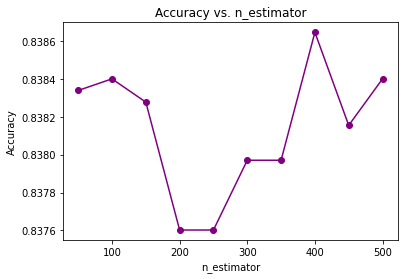

In [20]:
#Plotting the Accuracy vs. n_estimator graph
plt.plot(n_estimators_values, accuracy_scores, color="purple", marker="o")
plt.title("Accuracy vs. n_estimator")
plt.xlabel("n_estimator")
plt.ylabel("Accuracy")
plt.show()

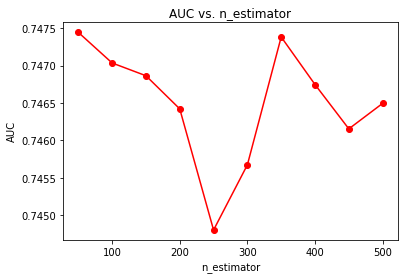

In [21]:
# Plotting the AUC vs. n_estimator graph
plt.plot(n_estimators_values, auc_scores, color="red", marker="o")
plt.title("AUC vs. n_estimator")
plt.xlabel("n_estimator")
plt.ylabel("AUC")
plt.show()

For Random Forest model
1. Write your observations about the Classifier’s behavior with respect to the number of estimators
- Based on the accuracy and AUC scores, it seems like the performance of the random forest classifier doens't improve significantly beyond a certain number of estimators. Specifically:
  - The accuracy score starts off at around 0.83833. It remains relatively stable as the n_estimator value goes from 50 to 150, before decreasing slightly at n_estimator = 200 where it remains relatively stable until it starts slightly increasing as the n_estimator value goes from 250 to 350. The highest accuracy score is achieved at n_estimators = 400 with a value of 0.838646, but the difference compared to other values remains relatively small. The accuracy values fluctuate between 0.8376 and 0.8386.
  - The AUC score begins at around 0.74744 but slightly decreases as the number of estimator increases from 50 to 250. However, from n_estimator = 300, the score increases before slightly decreasing again at 400 to 450, and finally a slight increase at 500. Even though the AUC score fluctuates within the given range of n_estimastor values, the highest AUC score is achieved at n_estimators=50, with a value of 0.74744.

- Overall, it seems that increasing the number of estimators beyond a certain point does not provide significant improvements in the accuracy or AUC score of the classifier on this particular dataset.

2. Is there an optimal value of the estimator within the given range?

- Based on the accuracy and AUC scores, there doesn't seem to be one clear optimal value of the estimator for both the accuracy and AUC score since the highest value for each of these measures is achieved at a different n_estimator value. Specifically, the optimal value for accuracy is at n_estimator = 400, while that of AUC score is at n_estimator = 50. Thus, there isn't a single optimal value.

**4. Building AdaBoost, Gradient Boost, and XGB**

**AdaBoost**

In [22]:
#Training the model using AdaBoost algorithm and calculating accuracy and AUC for each n_estimator value
from sklearn.ensemble import AdaBoostClassifier
n_estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# Creating empty lists to store the results
accuracy_values = []
auc_values = []


for n in n_estimators:
    model = AdaBoostClassifier(n_estimators=n, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy_values.append(accuracy_score(y_test,y_pred))
    auc_values.append(roc_auc_score(y_test, y_pred))


In [23]:
accuracy_values

[0.8449112462379461,
 0.8447884036607088,
 0.8447884036607088,
 0.8447884036607088,
 0.8447884036607088,
 0.8447884036607088,
 0.8447884036607088,
 0.8447884036607088,
 0.8447884036607088,
 0.8447884036607088]

In [24]:
auc_values

[0.7463574393397931,
 0.7460076328264228,
 0.7460076328264228,
 0.7460076328264228,
 0.7460076328264228,
 0.7460076328264228,
 0.7460076328264228,
 0.7460076328264228,
 0.7460076328264228,
 0.7460076328264228]

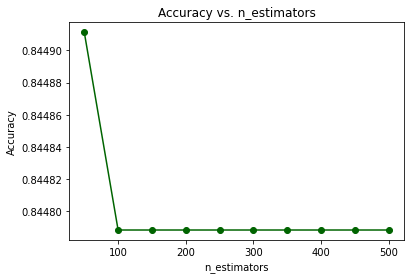

In [25]:
# Plotting the accuracy vs. n_estimator graph
plt.plot(n_estimators, accuracy_values, color="darkgreen", marker="o")
plt.title('Accuracy vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

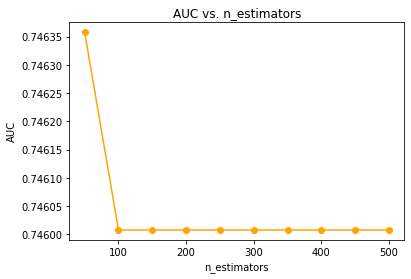

In [26]:
# Plot the AUC vs. n_estimator graph
plt.plot(n_estimators, auc_values, color="orange", marker="o")
plt.title('AUC vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.show()

1. Write your observations about the Classifier’s behavior with respect to the number of estimators
- The highest value of the accuracy score is achieved at n_estimator = 50 with a value of 0.84491. For the rest of the n_estimator values, the accuracy remains constant at around 0.844788 with an increase in the value of the n_estimator.
- The highest AUC value is achieved at n_estimator = 50 with a value of 0.74636. For the rest of the n_estimator values, the AUC value remains constant at around 0.74600 and doesn't seem to increase with an increase in the n_estimator value.
- Overall, the accuracy and AUC values of the AdaBoost Classifier for this particular dataset don't increase with an increase in the n_estimator value.

2. Is there an optimal value of the estimator within the given range?
- Based on the accuracy and AUC values, the optimal value of the estimator is at n_estimator = 50 since beyond this value, neither the accuracy values nor the auc values seem to increase.


**Gradient Boosting classifier**

In [27]:
#Training the model using Gradient Boosting Classifier and calculating accuracy and AUC for each n_estimator value
from sklearn.ensemble import GradientBoostingClassifier
n_estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# creating empty lists for accuracy and AUC
accuracy_list = []
auc_list = []

# Train the model for each n_estimators value and record accuracy and AUC
for n in n_estimators:
    gb = GradientBoostingClassifier(n_estimators=n, random_state=101)
    gb.fit(x_train, y_train)
    y_pred = gb.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    auc = roc_auc_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    auc_list.append(auc)


In [28]:
accuracy_list

[0.8462625145875561,
 0.8468153061851238,
 0.8470609913395983,
 0.846446778453412,
 0.8463239358761747,
 0.8458939868558443,
 0.8460168294330815,
 0.845771144278607,
 0.8456483017013697,
 0.8454640378355138]

In [29]:
auc_list

[0.7441889714189291,
 0.7553263867587273,
 0.759438252077731,
 0.7602035106735995,
 0.7591353352565948,
 0.7598416288883161,
 0.7601914354016863,
 0.7598510068267629,
 0.7597705886522556,
 0.7597397575034485]

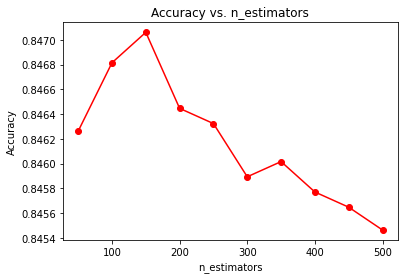

In [30]:
#Plotting the accuracy vs. n_estimators graph
plt.plot(n_estimators, accuracy_list, color="red", marker="o")
plt.title('Accuracy vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

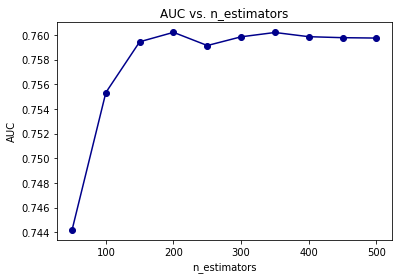

In [31]:
#Plotting the AUC vs. n_estimators graph
plt.plot(n_estimators, auc_list, color="darkblue", marker="o")
plt.title('AUC vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.show()

1. Write your observations about the Classifier’s behavior with respect to the number of estimators
- From 50 to 150, the accuracy score increases with an increase in the value of n_estimators. The highest accuracy score is achieved at n_estimator = 150 with a value of 0.84706. From there, the accuracy score decreases and fluctuates within a small range of 0.8454 and 0.8465. 
- For the AUC values, the value increases with an increase in the n_estimator value from 50 to 200. The highest AUC value is achieved at n_estimator = 200 with a value of 0.760204. From there, the value slightly decrease as the n_estimator values increase. However, the values varry within a small range of 0.760191 and 0.759135.
- This shows that increasing the n_estimator past a certain point doesn't increase the accuracy score or the auc value of the model.It's worth noting that the range of the accuracy and auc scores is significantly small which suggests that the model's performance isn't very sensitive to the given range of n_estimators.

2. Is there an optimal value of the estimator within the given range?
- Based on the accuracy and AUC scores, there isn't a single optimal value for n_estimators within the given range.The highest accuracy score is achieved for n_estimators=150, while the highest AUC score is achieved for n_estimators=200.Thus, the two measures have different optimal values, which is why there isn't a single optimal value within the given n_estimator range. 

**XGB**

In [32]:
#Importing the XGB library and training the model
import xgboost as xgb
n_estimators_values = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# Define lists to store accuracy and AUC values
accuracy_values = []
auc_values = []

# Train and evaluate the model for each value of n_estimators
for n_estimators in n_estimators_values:
    # Create and fit the model
    model = xgb.XGBClassifier(n_estimators=n_estimators, random_state=101)
    model.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(x_test)

    # Calculate accuracy and AUC
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])

    # Append accuracy and AUC values to their respective lists
    accuracy_values.append(accuracy)
    auc_values.append(auc)



In [33]:
accuracy_values

[0.8449726675265647,
 0.8461396720103188,
 0.8467538848965052,
 0.8466310423192679,
 0.8461396720103188,
 0.8459554081444629,
 0.845771144278607,
 0.8459554081444629,
 0.8460168294330815,
 0.8461396720103188]

In [34]:
auc_values

[0.8975160904305091,
 0.8993980137170907,
 0.8994900994270572,
 0.8994618715186887,
 0.8993971146059352,
 0.8992200315274372,
 0.899149482666078,
 0.8990933614023291,
 0.899034103704317,
 0.8990170205923637]

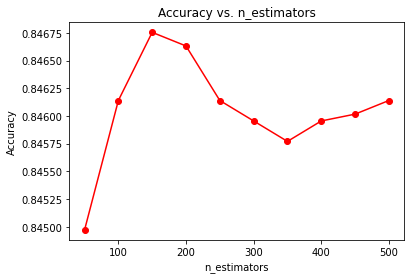

In [35]:
#Plotting Accuracy vs. n_estimators
plt.plot(n_estimators_values, accuracy_values, color="red", marker="o")
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. n_estimators')
plt.show()

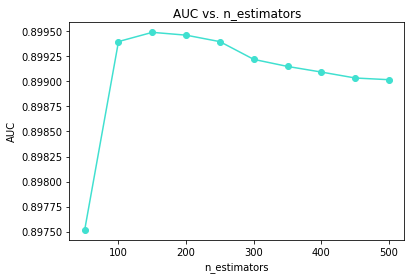

In [36]:
plt.plot(n_estimators_values, auc_values, color="turquoise", marker="o")
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.title('AUC vs. n_estimators')
plt.show()

1. Write your observations about the Classifier’s behavior with respect to the number of estimators
- The accuracy values start off at around 0.8449 and slightly increase as the number of estimators increases.The highest accuracy value is achieved at n_estimator = 150 with a value of 0.84675. From there, the accuracy values seem to plateau or slightly decrease after the accuracy values plateau between 0.8457 and 0.8461, with some minor fluctuations up and down. This suggests that adding more estimators beyond a certain point may not lead to significant improvements in accuracy.

- The AUC values start off at around 0.89751 and increase as the number of estimators increases. The highest AUC value is achieved at n_estimator = 150 with a value of 0.89949 However, after about 150 estimators, the AUC values plateau between 0.89901 and 0.89946, with some minor fluctuations up and down. This suggests that adding more estimators beyond a certain point may not lead to significant improvements in AUC.

- Overall, at the beginning, the accuracy and AUC values generally increase as the number of estimators increases, but there is a point beyond which adding more estimators doesn't lead to improvements in both values.

2. Is there an optimal value of the estimator within the given range?
- Based on the accuracy and AUC values, the optimal value of the estimator is 150 since that's where both the accuracy and AUC values are highest within the given range.

**5. Compare performance**

In [37]:
# creating a dictionary with model names and accuracy/AUC values
data = {"": ['Random Forest', 'AdaBoost', 'Gradient Boosting', 'XGBoost'],
        'Accuracy': [0.8386462747988452, 0.8449112462379461, 0.8470609913395983, 0.8467538848965052],
        'AUC': [0.7474428337809026, 0.7463574393397931, 0.7602035106735995, 0.8994900994270572]}

# creating a pandas DataFrame from the dictionary
comparison = pd.DataFrame(data)

# setting the Model column as the index
comparison.set_index("", inplace=True)

# transposing the DataFrame
comparison = comparison.transpose()

# displaying the DataFrame
print(comparison)

          Random Forest  AdaBoost  Gradient Boosting   XGBoost
Accuracy       0.838646  0.844911           0.847061  0.846754
AUC            0.747443  0.746357           0.760204  0.899490


Based on the calculated accuracy values and AUC values for this dataset, the model with the highest accuracy value is Gradient Boosting with 0.847061, while the model with the highest AUC value is XGBoost with 0.899490.